In [1]:
#Import functions
import numpy as np
import pandas as pd
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MaxAbsScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.regression import GBTRegressor
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import get_cmap
from pyspark.ml.evaluation import RegressionEvaluator

In [2]:
#Loading tables
dfTwitter = spark.read.json('/FileStore/tables/TwitterData.json')
dfStock = spark.read.format("csv").option("header", "true").load("/FileStore/tables/*.csv")

dfAvgSent = dfTwitter.groupby('tweet_hour', 'company').agg(F.mean('sentiment'), F.mean('followers_count'))
dfAvgSent = dfAvgSent.withColumnRenamed('company', 'comp')
dfAvgStock = dfStock.groupby('stock_hour', 'company').agg(F.mean('close'), F.mean('volume'))

dfJoin = dfAvgSent.join(dfAvgStock, (dfAvgSent.comp == dfAvgStock.company) & (dfAvgSent.tweet_hour == dfAvgStock.stock_hour+5))
dfJoin = dfJoin.withColumnRenamed("avg(sentiment)","avg-sentiment")
dfJoin = dfJoin.withColumnRenamed("avg(close)","avg-close")
dfJoin = dfJoin.withColumnRenamed("avg(volume)","avg-volume")
dfJoin = dfJoin.withColumnRenamed("avg(followers_count)","avg-followers")
dfJoin.show(5)
dfFacebook = dfJoin.select('*').where(dfJoin.company == 'FACEBOOK')
dfAmazon = dfJoin.select('*').where(dfJoin.company == 'AMAZON')
dfGoogle = dfJoin.select('*').where(dfJoin.company == 'GOOGLE')
dfNetflix = dfJoin.select('*').where(dfJoin.company == 'NETFLIX')
dfSnapchat = dfJoin.select('*').where(dfJoin.company == 'SNAPCHAT')
dfMicrosoft = dfJoin.select('*').where(dfJoin.company == 'MICROSOFT')
dfFacebook.describe().toPandas().transpose()
display(dfFacebook)

tweet_hour,comp,avg-sentiment,avg-followers,stock_hour,company,avg-close,avg-volume
10151816,FACEBOOK,0.0829153378749519,8589.73570019724,10151811,FACEBOOK,154.96449166666667,199680.08333333334
10181817,FACEBOOK,0.04603225031068867,5341.205856515373,10181812,FACEBOOK,155.24916666666667,196831.33333333334
10181814,FACEBOOK,0.004247978124916783,5429.657281259461,10181809,FACEBOOK,157.125,493893.0
10151815,FACEBOOK,0.0965747998135153,5929.3174285714285,10151810,FACEBOOK,153.4600583333333,229640.33333333334
10171819,FACEBOOK,0.07147276378412215,7401.999723374827,10171814,FACEBOOK,158.75875,130024.5
10171821,FACEBOOK,0.0661784867169528,5625.310693236037,10171816,FACEBOOK,159.46,679948.0
10191818,FACEBOOK,0.05802982896076024,10019.511982570806,10191813,FACEBOOK,154.90694166666665,110940.08333333333
10161820,FACEBOOK,-0.06586518998495068,4652.240130051092,10161815,FACEBOOK,158.376675,287864.6666666667
10191821,FACEBOOK,0.05099529239188861,6242.411463664278,10191816,FACEBOOK,153.98,760460.0
10161816,FACEBOOK,-0.08384430224101197,5768.041213508873,10161811,FACEBOOK,156.80258333333333,210932.91666666666


In [3]:
#Feature scaling using MaxAbsScaler
vectorAssembler = VectorAssembler(inputCols = ['avg-sentiment','avg-followers','avg-volume'], outputCol = 'features')
v_dffacebook = vectorAssembler.transform(dfFacebook)
scaler = MaxAbsScaler(inputCol="features", outputCol="scaledFeatures")
scalerModel = scaler.fit(v_dffacebook)
scaledData = scalerModel.transform(v_dffacebook)
scaledData.select("features", "scaledFeatures").show()
v_dffacebook1 = scaledData.select(['features','scaledFeatures','avg-close'])
v_dffacebook1.show()

+--------------------+--------------------+
 features| scaledFeatures|
+--------------------+--------------------+
[0.08291533787495...|[0.81333235380318...|
[0.04603225031068...|[0.45153911755764...|
[0.00424797812491...|[0.04166922713929...|
[0.09657479981351...|[0.94732061960428...|
[0.07147276378412...|[0.70108996346405...|
[0.06617848671695...|[0.64915739056395...|
[0.05802982896076...|[0.56922565340844...|
[-0.0658651899849...|[-0.6460842032018...|
[0.05099529239188...|[0.50022254334328...|
[-0.0838443022410...|[-0.8224447423408...|
[0.06366326694324...|[0.62448512037469...|
[0.03513558855807...|[0.34465168540107...|
[0.05895112685829...|[0.57826284009505...|
[0.06215845005402...|[0.60972408467347...|
[0.04640768656707...|[0.45522184335885...|
[0.01370440148441...|[0.13442908637236...|
[-0.0819692220240...|[-0.8040517230812...|
[0.05574866549007...|[0.54684928610929...|
[0.07289935028255...|[0.71508362235043...|
[0.05993472030419...|[0.58791109568971...|
+--------------------+--------------------+
only showing top 20 rows

+--------------------+--------------------+------------------+
 features| scaledFeatures| avg-close|
+--------------------+--------------------+------------------+
[0.08291533787495...|[0.81333235380318...|154.96449166666667|
[0.04603225031068...|[0.45153911755764...|155.24916666666667|
[0.00424797812491...|[0.04166922713929...| 157.125|
[0.09657479981351...|[0.94732061960428...| 153.4600583333333|
[0.07147276378412...|[0.70108996346405...| 158.75875|
[0.06617848671695...|[0.64915739056395...| 159.46|
[0.05802982896076...|[0.56922565340844...|154.90694166666665|
[-0.0658651899849...|[-0.6460842032018...| 158.376675|
[0.05099529239188...|[0.50022254334328...| 153.98|
[-0.0838443022410...|[-0.8224447423408...|156.80258333333333|
[0.06366326694324...|[0.62448512037469...|154.08235000000002|
[0.03513558855807...|[0.34465168540107...|156.13039166666667|
[0.05895112685829...|[0.57826284009505...|156.35448333333335|
[0.06215845005402...|[0.60972408467347...|154.93541666666667|
[0.04640768656707...|[0.45522184335885...|154.84671666666665|
[0.01370440148441...|[0.13442908637236...|156.68850833333337|
[-0.0819692220240...|[-0.8040517230812...| 158.895|
[0.05574866549007...|[0.54684928610929...| 159.1401|
[0.07289935028255...|[0.71508362235043...| 154.92335|
[0.05993472030419...|[0.58791109568971...|159.03779999999998|
+--------------------+--------------------+------------------+
only showing top 20 rows

In [4]:
#Train test split
train_df,test_df = v_dffacebook1.randomSplit([0.8, 0.2])

In [5]:
#Linear Regression model
lr = LinearRegression(featuresCol = 'features', labelCol='avg-close', maxIter=10)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [-8.38551034426,-1.63403103616e-05,-8.22110089281e-07]
Intercept: 156.958904415
RMSE: 2.049779
r2: 0.051057

In [6]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","avg-close","scaledFeatures")
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="avg-close",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.153843

In [7]:
#Plot of Linear Regression
disp_pred = lr_predictions.select('avg-close','prediction')
display(disp_pred)

avg-close,prediction
158.376675,157.19854215278022
156.13039166666667,156.39107381042803
154.84671666666665,156.40075819520467
156.68850833333337,156.5857261670877
158.895,156.4417681440824
154.24666666666664,156.1683820209335
155.81168333333332,157.28193771156762
157.22791666666666,157.36039680651535
154.83833333333334,156.18279888488624


In [8]:
#Test set evaluation
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 1.3976

In [9]:
#Decision Tree Regression
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'avg-close')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="avg-close", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2.17254

In [10]:
predictions_dt = dt_model.transform(test_df)
predictions_dt.select("prediction","avg-close","scaledFeatures").show()
#Plot of Decision Tree Regression 
disp_pred = predictions_dt.select('avg-close','prediction')
display(disp_pred)

avg-close,prediction
158.376675,155.24916666666667
156.13039166666667,155.24916666666667
154.84671666666665,155.65706500000002
156.68850833333337,155.24916666666667
158.895,155.24916666666667
154.24666666666664,155.65706500000002
155.81168333333332,157.5070611111111
157.22791666666666,155.24916666666667
154.83833333333334,157.5070611111111


In [11]:
#Decision Tree Regression with pruning
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='scaledFeatures', labelCol = 'avg-close', maxDepth=4)
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="avg-close", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2.29814

In [12]:
predictions_dt_prune = dt_model.transform(test_df)
predictions_dt_prune.select("prediction","avg-close","scaledFeatures").show()
#Plot of Decision Tree Regression with Pruning
disp_pred = predictions_dt_prune.select('avg-close','prediction')
display(disp_pred)

avg-close,prediction
158.376675,155.24916666666667
156.13039166666667,155.24916666666667
154.84671666666665,156.96294460784313
156.68850833333337,155.24916666666667
158.895,155.24916666666667
154.24666666666664,156.96294460784313
155.81168333333332,156.96294460784313
157.22791666666666,155.24916666666667
154.83833333333334,156.96294460784313


In [13]:
#Gradient Boosting
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'avg-close', maxIter=10,maxDepth=3)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'avg-close', 'scaledFeatures').show(10)

+------------------+------------------+--------------------+
 prediction| avg-close| scaledFeatures|
+------------------+------------------+--------------------+
155.69267193691292| 158.376675|[-0.6460842032018...|
155.25003115188724|156.13039166666667|[0.34465168540107...|
155.94839860938154|154.84671666666665|[0.45522184335885...|
154.80903475188722|156.68850833333337|[0.13442908637236...|
155.58481568577534| 158.895|[-0.8040517230812...|
 155.2179054852206|154.24666666666664|[0.63606831349945...|
 157.44986809443|155.81168333333332|[-0.8545844144677...|
 155.3540602242129|157.22791666666666|[-0.6947657407482...|
157.78075174878245|154.83833333333334|[0.51121738191129...|
+------------------+------------------+--------------------+

In [14]:
#Plot of Gradient Boosting 
disp_pred = gbt_predictions.select('avg-close','prediction')
display(disp_pred)
gbt_evaluator = RegressionEvaluator(
    labelCol="avg-close", predictionCol="prediction", metricName="rmse")


avg-close,prediction
158.376675,155.69267193691292
156.13039166666667,155.25003115188724
154.84671666666665,155.94839860938154
156.68850833333337,154.80903475188722
158.895,155.58481568577534
154.24666666666664,155.2179054852206
155.81168333333332,157.44986809443
157.22791666666666,155.3540602242129
154.83833333333334,157.78075174878245


In [15]:
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2.0944

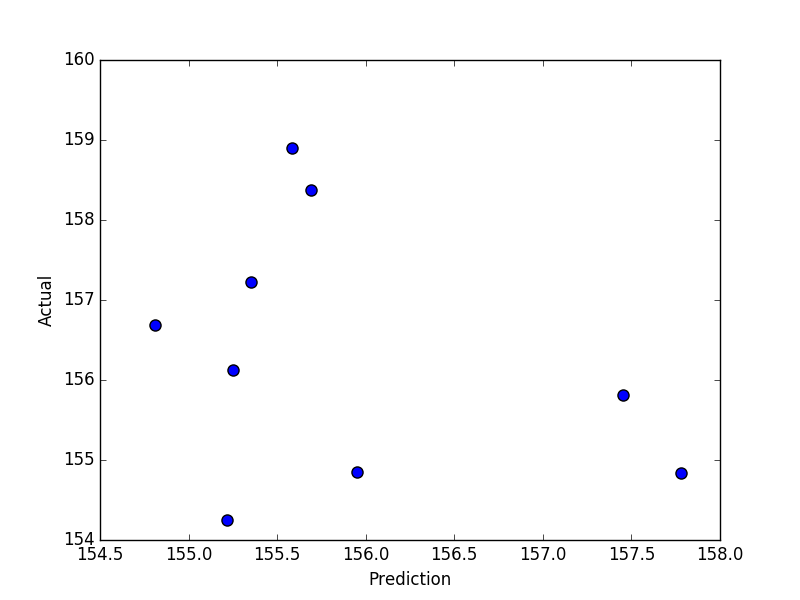

In [16]:
# from matplotlib.colors import ListedColormap, Normalize
# from matplotlib.cm import get_cmap
# cmap = get_cmap('YlOrRd')
import matplotlib.pyplot as plt
npts = 10
preds = [row['prediction'] for row in disp_pred.select('prediction').take(npts)]
labs = [row['avg-close'] for row in disp_pred.select('avg-close').take(npts)]
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.scatter(preds, labs, s=8**2)
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
display(fig)

In [17]:
#Classification
df_fb = v_dffacebook1.toPandas()
df_fbmean = np.mean(df_fb["avg-close"])
class_labels = (df_fb['avg-close']>df_fbmean).astype(int)
df_fb = pd.concat([df_fb.features,df_fb.scaledFeatures,class_labels],axis=1)
df_fb = spark.createDataFrame(df_fb)
df_fb = df_fb.withColumnRenamed("avg-close","lowhigh")

In [18]:
train_df,test_df = df_fb.randomSplit([0.8, 0.2],seed=12345678)

In [19]:
# from pyspark.ml.classification import LogisticRegression
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# lr = LogisticRegression(maxIter=10,labelCol="lowhigh", featuresCol="features")
# lrModel = lr.fit(train_df)
# trainingSummary = lrModel.summary
# objectiveHistory = trainingSummary.objectiveHistory
# print("objectiveHistory:")
# for objective in objectiveHistory:
#     print(objective)
# predictions = lrModel.transform(test_df)
# predictions.select("prediction", "lowhigh", "features").show(5)


# # Select (prediction, true label) and compute test error
# evaluator = MulticlassClassificationEvaluator(
#     labelCol="lowhigh", predictionCol="prediction", metricName="accuracy")
# accuracy = evaluator.evaluate(predictions)
# print("Accuracy= %g" % (accuracy))
# print("Test Error = %g" % (1.0 - accuracy))

objectiveHistory:
0.692552532361
0.691701068812
0.586493504695
0.581394834162
0.580464673181
0.578120589419
0.575134193048
0.571468520187
0.570914936123
0.570617810312
0.57060842748
+----------+-------+--------------------+
prediction|lowhigh| features|
+----------+-------+--------------------+
 1.0| 1|[-0.0838443022410...|
 0.0| 1|[0.05895112685829...|
 0.0| 1|[0.05993472030419...|
 0.0| 0|[0.06215845005402...|
 0.0| 0|[0.07036808460868...|
+----------+-------+--------------------+
only showing top 5 rows

Accuracy= 0.6
Test Error = 0.4

In [20]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
dt = DecisionTreeClassifier(labelCol="lowhigh", featuresCol="features",maxDepth=2)
model = dt.fit(train_df)

predictions = model.transform(test_df)
predictions.select("prediction", "lowhigh", "features").show(5)


# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="lowhigh", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy= %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

+----------+-------+--------------------+
prediction|lowhigh| features|
+----------+-------+--------------------+
 0.0| 0|[0.09657479981351...|
 1.0| 1|[-0.0658651899849...|
 0.0| 1|[0.06617848671695...|
 0.0| 0|[0.05099529239188...|
 0.0| 0|[0.04640768656707...|
+----------+-------+--------------------+
only showing top 5 rows

Accuracy= 0.7
Test Error = 0.3

In [21]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
rf = RandomForestClassifier(labelCol="lowhigh", featuresCol="features", numTrees=10,maxDepth=3)
model = rf.fit(train_df)

predictions = model.transform(test_df)
predictions.select("prediction", "lowhigh", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="lowhigh", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy= %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

+----------+-------+--------------------+
prediction|lowhigh| features|
+----------+-------+--------------------+
 0.0| 0|[0.09657479981351...|
 1.0| 1|[-0.0658651899849...|
 1.0| 1|[0.06617848671695...|
 1.0| 0|[0.05099529239188...|
 0.0| 0|[0.04640768656707...|
+----------+-------+--------------------+
only showing top 5 rows

Accuracy= 0.6
Test Error = 0.4

In [22]:
#GBT classifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
gbt = GBTClassifier(labelCol="lowhigh", featuresCol="features", maxIter=10,maxDepth=3)
model = gbt.fit(train_df)
predictions = model.transform(test_df)
predictions.select("prediction", "lowhigh", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="lowhigh", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy= %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

+----------+-------+--------------------+
prediction|lowhigh| features|
+----------+-------+--------------------+
 0.0| 0|[0.09657479981351...|
 1.0| 1|[-0.0658651899849...|
 1.0| 1|[0.06617848671695...|
 1.0| 0|[0.05099529239188...|
 0.0| 0|[0.04640768656707...|
+----------+-------+--------------------+
only showing top 5 rows

Accuracy= 0.8
Test Error = 0.2